In [1]:
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns

# plots
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Cargo los archivos
vistas = pd.read_csv('data-tp/vistas_limpio.csv')
postulantes_genero_edad = pd.read_csv('data-tp/postulantes_genero_edad_limpio.csv')
postulantes_edu = pd.read_csv('data-tp/fiuba_1_postulantes_educacion.csv')
postulaciones = pd.read_csv('data-tp/fiuba_4_postulaciones.csv')
avisos = pd.read_csv('data-tp/avisos_detalles.csv')

In [3]:
# Saco la columna Unnamed: 0 
postulantes_genero_edad = postulantes_genero_edad.drop(columns=['Unnamed: 0'])

In [4]:
postulantes = pd.merge(postulantes_edu, postulantes_genero_edad, on='idpostulante')
postulantes.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,8BkL,Universitario,En Curso,1976-07-21,FEM
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,8BkL,Posgrado,Graduado,1976-07-21,FEM


In [5]:
# Renombro la columna de 'nombre' (educacion) a 'educacion'
postulantes['educacion'] = postulantes['nombre']
postulantes = postulantes.drop(columns=['nombre'])
postulantes.head()

,idpostulante,estado,fechanacimiento,sexo,educacion
0,NdJl,En Curso,1969-05-09,MASC,Posgrado
1,NdJl,Graduado,1969-05-09,MASC,Universitario
2,8BkL,En Curso,1976-07-21,FEM,Universitario
3,8BkL,Graduado,1976-07-21,FEM,Universitario
4,8BkL,Graduado,1976-07-21,FEM,Posgrado


In [6]:
len(postulantes)

294662

In [7]:
postulantes['educacion'].unique()

array(['Posgrado', 'Universitario', 'Master', 'Otro', 'Terciario/Técnico',
       'Secundario', 'Doctorado'], dtype=object)

In [8]:
carrers_by_priority = ['Secundario','Terciario/Técnico','Otro','Universitario','Posgrado','Master','Doctorado']
def get_higher_carrer(serie):
    high = 0
    for index in range(len(carrers_by_priority)):
        for carrer in serie['educacion']:
            if(carrers_by_priority[index] == carrer):
                high = index if index > high else high
    return carrers_by_priority[high]

postulantes_fil = postulantes.groupby('idpostulante').agg(get_higher_carrer).reset_index()[['idpostulante','educacion']]
postulantes = postulantes.merge(postulantes_fil, how = 'inner', on=['idpostulante','educacion'])
# postulantes['educacion_index'] = carrers_by_priority.index(postulantes['educacion'])

In [9]:
# Deberia haberse reducido bastante el tamaño del DF
len(postulantes)

197118

In [9]:
postulantes.head()

,idpostulante,estado,fechanacimiento,sexo,educacion
0,NdJl,En Curso,1969-05-09,MASC,Posgrado
1,8BkL,Graduado,1976-07-21,FEM,Master
2,1d2B,En Curso,1976-02-28,MASC,Universitario
3,NPBx,En Curso,1981-03-09,MASC,Master
4,Ym2X,Graduado,1964-01-19,MASC,Universitario


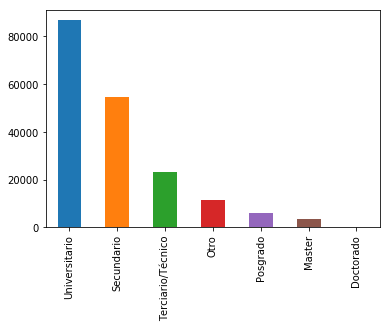

In [11]:
# Cantidad de postulantes segun nivel educativo
postulantes_fil['educacion'].value_counts().plot.bar(x='educacion')

In [ ]:
postulante

In [11]:
count_postulaciones = postulaciones.groupby('idpostulante').count().reset_index()
count_postulaciones['postulaciones'] = count_postulaciones['idaviso']
count_postulaciones = count_postulaciones[['idpostulante', 'postulaciones']]
count_postulaciones.head()

,idpostulante,postulaciones
0,0z5VvGv,34
1,0zB026d,3
2,0zB03O9,17
3,0zB08lq,1
4,0zB0NWY,1


In [12]:
postulantes = pd.merge(postulantes, count_postulaciones, on='idpostulante')
postulantes.head()

,idpostulante,estado,fechanacimiento,sexo,educacion,postulaciones
0,NdJl,En Curso,1969-05-09,MASC,Posgrado,16
1,8BkL,Graduado,1976-07-21,FEM,Master,12
2,1d2B,En Curso,1976-02-28,MASC,Universitario,4
3,NPBx,En Curso,1981-03-09,MASC,Master,24
4,Ym2X,Graduado,1964-01-19,MASC,Universitario,11


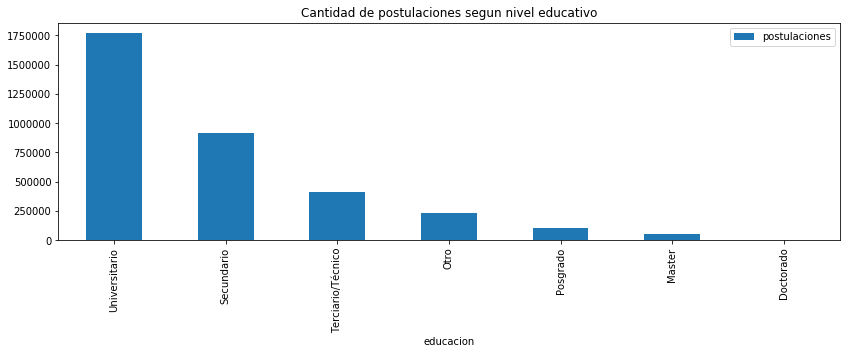

In [14]:
postulantes[['educacion', 'postulaciones']]\
.groupby('educacion').sum().sort_values('postulaciones', ascending=False).plot(kind='bar',\
figsize=(14,4), \
title='Cantidad de postulaciones segun nivel educativo');

In [17]:
postulantes['fechanacimiento'] = pd.to_datetime(postulantes['fechanacimiento'])

In [19]:
postulantes['year'] = postulantes['fechanacimiento'].dt.year

In [12]:
postulantes.head()

,idpostulante,estado,fechanacimiento,sexo,educacion,year
0,NdJl,En Curso,1969-05-09,MASC,Posgrado,1969
1,8BkL,Graduado,1976-07-21,FEM,Master,1976
2,1d2B,En Curso,1976-02-28,MASC,Universitario,1976
3,NPBx,En Curso,1981-03-09,MASC,Master,1981
4,Ym2X,Graduado,1964-01-19,MASC,Universitario,1964


In [162]:
postulantes['educacion'].unique()

array(['Posgrado', 'Master', 'Universitario', 'Terciario/Técnico', 'Otro',
       'Doctorado', 'Secundario'], dtype=object)

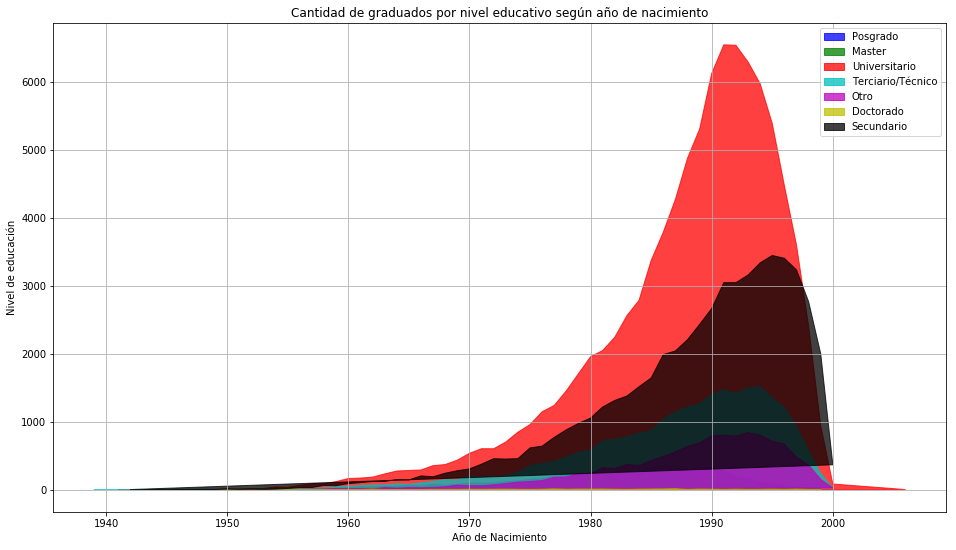

In [216]:
# Educacion segun edad
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
color = 0
for i in postulantes['educacion'].unique():
    df = postulantes.loc[postulantes['educacion'] == i,['year', 'educacion']].loc[postulantes['year'] > 1930, :]
    x = df.groupby('year').count().reset_index()['year']
    y = df.groupby('year').count().reset_index()['educacion']
    plt.fill(x, y, alpha=0.75, color=colors[color])
    color+=1

plt.xlabel('Año de Nacimiento')
plt.ylabel('Nivel de educación')
plt.legend(postulantes['educacion'].unique())#, loc=2)
plt.title('Cantidad de graduados por nivel educativo según año de nacimiento')
plt.grid(True)

plt.show()

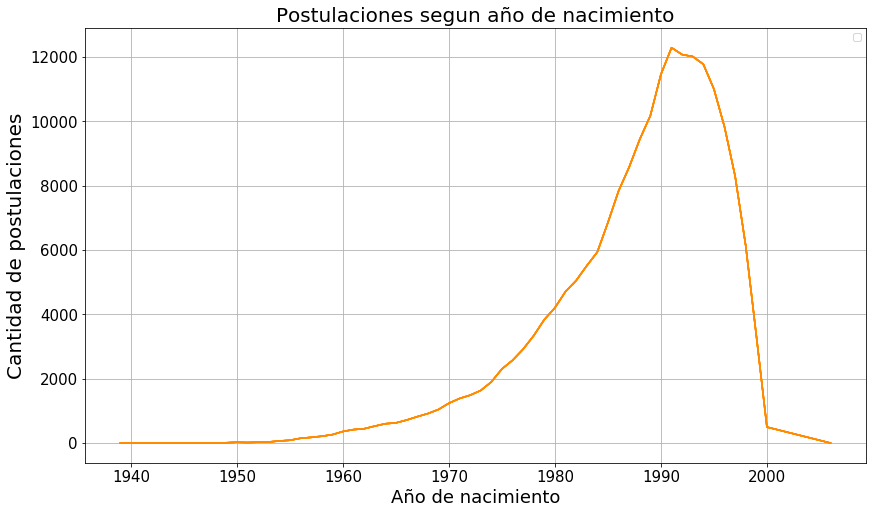

In [214]:
postulantes.loc[postulantes['year'] > 1930, :].groupby('year').count().reset_index().plot.line(figsize=(14,8), color='darkorange', fontsize=15, x='year');
plt.xlabel('Año de nacimiento', fontsize=18)
plt.ylabel('Cantidad de postulaciones', fontsize=20)
plt.title('Postulaciones segun año de nacimiento', fontsize=20);
plt.grid(True)
plt.legend('');
plt.show()